<a href="https://colab.research.google.com/github/Razan-SM2/PicLingo/blob/main/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip


--2024-02-03 17:24:23--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.182.70.1, 3.5.20.197, 52.217.230.9, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.182.70.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘coco_train2017.zip’

coco_train2017.zip  100%[===================>]  18.01G  88.4MB/s    in 3m 18s  

2024-02-03 17:27:41 (93.0 MB/s) - ‘coco_train2017.zip’ saved [19336861798/19336861798]

--2024-02-03 17:27:41--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.29.25, 52.216.29.212, 54.231.200.161, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.29.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[===================>] 

In [2]:
from zipfile import ZipFile, BadZipFile
import os
def extract_zip_file(extract_path):
    try:
        with ZipFile(extract_path+".zip") as zfile:
            zfile.extractall(extract_path)
        # remove zipfile
        zfileTOremove=f"{extract_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)
    except BadZipFile as e:
        print("Error:", e)
extract_train_path = "./coco_train2017"
extract_val_path = "./coco_val2017"
extract_ann_path="./coco_ann2017"
extract_zip_file(extract_train_path)
extract_zip_file(extract_val_path)
extract_zip_file(extract_ann_path)

In [3]:
pip install pycocotools

<ipython-input-8-a2945061f7e0>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


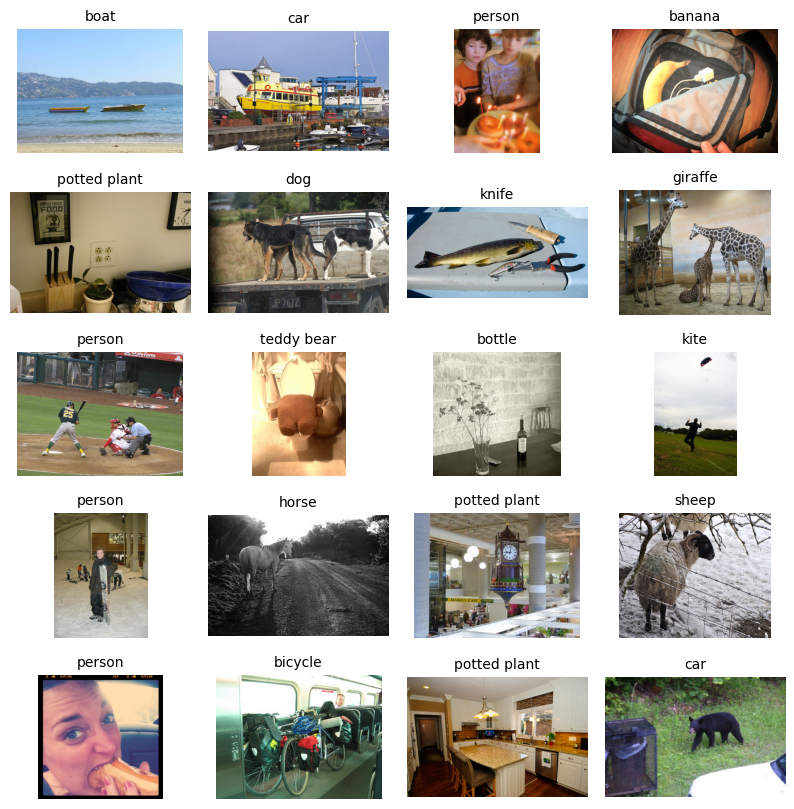

In [8]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image

# Path to the MS COCO annotations files
annotations_file = '/content/coco_ann2017/annotations/captions_train2017.json'
annotation_classes_file = '/content/coco_ann2017/annotations/instances_train2017.json'

# Path to the directory containing images
images_dir = '/content/coco_train2017/train2017'

# Number of samples to display
num_samples = 20

# Load annotations file
with open(annotations_file, 'r') as f:
    annotations = json.load(f)

# Load annotation classes file
with open(annotation_classes_file, 'r') as f:
    classes = json.load(f)

# Create a dictionary to map category IDs to class names
id_to_name = {category['id']: category['name'] for category in classes['categories']}

# Get list of image IDs
image_ids = [entry['id'] for entry in annotations['images']]

# Randomly select num_samples image IDs
selected_image_ids = random.sample(image_ids, num_samples)

# Set up Matplotlib figure and grid
fig = plt.figure(figsize=(10, 10))
grid = gridspec.GridSpec(5, 4, wspace=0.1, hspace=0.3)

# Iterate over selected images
for i, image_id in enumerate(selected_image_ids):
    # Find corresponding annotation
    annotation = next(entry for entry in annotations['annotations'] if entry['image_id'] == image_id)

    # Find corresponding image class
    img_class = next((entry for entry in classes['annotations'] if entry['image_id'] == image_id), None)
    if img_class:
        class_label = id_to_name[img_class['category_id']]
    else:
        class_label = None

    # Get image file name and path
    image_filename = str(image_id).zfill(12) + '.jpg'
    image_path = os.path.join(images_dir, image_filename)

    # Open image using PIL
    img = Image.open(image_path)

    # Add image to the grid
    ax = plt.subplot(grid[i])
    ax.imshow(img)
    ax.axis('off')

    # Add caption and class label underneath the image
    if class_label:
        ax.set_title(class_label, fontsize=10)
    ax.set_xlabel(annotation['caption'], fontsize=8, wrap=True)

plt.tight_layout()
plt.show()
